In [1]:
import warnings
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binom_total_interval_stackoverflow(n_detected, p, confidence_level=0.68):
    """Return (lower, upper) confidence limits on the total number of events N
    given the number of detected events n_detected, and detection probability p
    
    """
    w = (1 - confidence_level) / 2
    lower = np.nan_to_num(n_det + stats.nbinom(n_det, p_true).ppf(w))
    upper = np.nan_to_num(n_det + stats.nbinom(n_det, p_true).ppf(1 - w))
    
    return lower, upper


def binom_total_interval_gauss(n_detected, p, confidence_level=0.68):
    w = (1 - confidence_level) / 2
    m = n_detected / p
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        
        s = np.sqrt(m * (1-p)/p)
        lower = stats.norm(m, s).ppf(w)
        upper = stats.norm(m, s).ppf(1 - w)
    
    lower = np.floor(np.nan_to_num(lower))
    upper = np.ceil(np.nan_to_num(upper))

    return lower, upper


def binom_total_interval_mystery(n_detected, p, confidence_level=0.68):
    w = (1 - confidence_level) / 2
    m = n_detected / p
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        q = 1 / p
        s = (q + (q**2 + 4 * m * q) ** 0.5) / 2
        
        lower = stats.norm(m, s).ppf(w)
        upper = stats.norm(m, s).ppf(1 - w)
    
    lower = np.floor(np.clip(np.nan_to_num(lower), 0, None))
    upper = np.ceil(np.clip(np.nan_to_num(upper), 0, None))
    
    return lower, upper

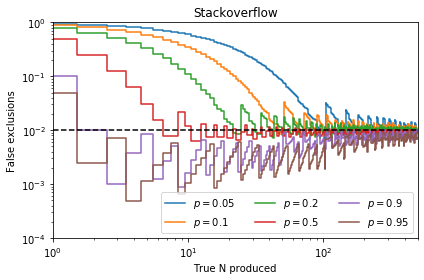

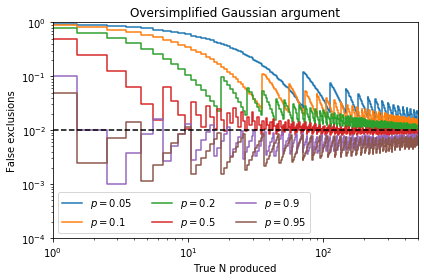

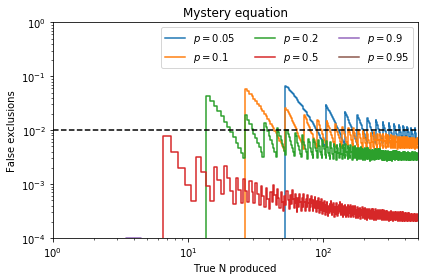

In [3]:
cl = 0.99
n_det_max = 500

for binom_interval_f, label in [
        (binom_total_interval_stackoverflow, 'Stackoverflow'),
        (binom_total_interval_gauss, 'Oversimplified Gaussian argument'),
        (binom_total_interval_mystery, 'Mystery equation')]:
    

    for p_true in [0.05, 0.1, 0.2, 0.5, 0.9, 0.95]:

        # Compute confidence belt; independent of true N
        n_det = np.arange(0, n_det_max)
        lower, upper = binom_interval_f(n_det, p_true, cl)

        n_true = np.arange(n_det_max)
        coverage = np.zeros(len(n_true))
        for i, n in enumerate(n_true):
            weights = stats.binom(n, p_true).pmf(n_det)
            is_valid = (lower <= n) & (n <= upper)
            coverage[i] = np.average(is_valid, weights=weights)

        plt.plot(n_true, 1 - coverage, label='$p = %s$' % p_true,
                 drawstyle='steps-mid')

    plt.axhline(1 - cl, c='k', linestyle='--')
    plt.legend(loc='best', ncol=3)

    plt.xscale('log')
    plt.xlim(1, n_det_max)
    plt.xlabel("True N produced")

    plt.ylabel("False exclusions")
    plt.yscale('log')
    plt.ylim(1e-4, 1)
    
    plt.title(label)
    plt.tight_layout()
    plt.savefig(label.lower().replace(' ', '_') + '.png', dpi=100, bbox_inches='tight')

    plt.show()